In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

In [2]:
def get_tiles(image):
    tiles = []
    num_tiles_x = int(np.floor(w/tile_size))
    num_tiles_y = int(np.floor(h/tile_size))
    for i in range(num_tiles_y):
        for j in range(num_tiles_x):
            tiles.append(image[i*tile_size:(i+1)*tile_size, j*tile_size:(j+1)*tile_size])
    tiles = np.array(tiles)
    return tiles

In [3]:
def compute_gradient(old_frame, new_frame):
    grad = np.array([[-1, 0, 1]])

    if old_frame.dtype in [int, "uint8"]:
        old_frame = old_frame.astype("float32") / 255.0
        
    if new_frame.dtype in [int, "uint8"]:
        new_frame = new_frame.astype("float32") / 255.0
        
    Gx = scipy.signal.convolve2d(new_frame, grad, mode='same')
    Gy = scipy.signal.convolve2d(new_frame, grad.T, mode='same')
    Gt = old_frame - new_frame
    
    return Gx, Gy, Gt

In [47]:
def lucas_kanade(im1, im2, make_plot=False):
    
    Gx, Gy, Gt = compute_gradient(im1, im2)
    tiles_gx = get_tiles(Gx)
    tiles_gy = get_tiles(Gy)
    tiles_gt = get_tiles(Gt)
    V = []
    
    for i in range(len(tiles_gx)):
        gx, gy, gt = [x.flatten() for x in [tiles_gx[i], tiles_gy[i], tiles_gt[i]]]
        A = np.vstack((gx, gy)).T
        try:
            v = np.linalg.pinv(A)@-gt
        except:
            v = [0,0]
        V.append(v)
    V = np.array(V)
    X = np.arange(np.floor(tile_size/2), np.floor(w/tile_size)*tile_size, tile_size)
    Y = np.arange(np.floor(tile_size/2), np.floor(h/tile_size)*tile_size, tile_size)
    P = np.array([[a,b] for a in Y for b in X])
    
    if make_plot:
        fig = plt.figure(figsize=(10,10))
        plt.imshow(im1)
        plt.quiver(P[:, 1].astype(int), P[:,0].astype(int), V[:,0], V[:,1], angles='xy', scale_units="xy", scale=0.1)
        plt.show()

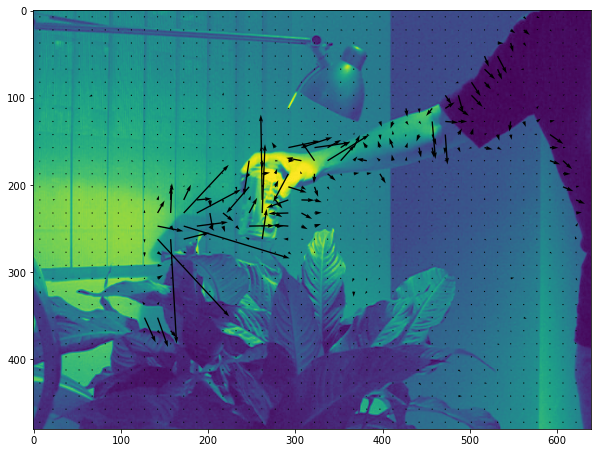

In [48]:
im1 = cv2.imread('images/Coke1.jpg', cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread('images/Coke2.jpg', cv2.IMREAD_GRAYSCALE)
tile_size = 15
h, w = im1.shape
lucas_kanade(im1, im2, make_plot=True)